## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  56.882352   860.420125  0.676753  1.315126  1.470107
1  56.063857  1605.139047  0.507432  5.852630  1.421848
2  66.058556   277.078082  0.897311  3.514847  1.418953
3  67.842858  1538.307877  0.364703  8.224388  1.599655
4  71.400114  1392.242923  0.753181  7.954897  1.747509


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.85128 | train_mse: 2.94466 | train_mae: 1.28784 |  0:00:00s


epoch 1  | loss: 0.65376 | train_mse: 1.50443 | train_mae: 0.96069 |  0:00:00s
epoch 2  | loss: 0.59189 | train_mse: 1.6624  | train_mae: 0.97574 |  0:00:00s


epoch 3  | loss: 0.66452 | train_mse: 1.1566  | train_mae: 0.82605 |  0:00:00s
epoch 4  | loss: 0.51083 | train_mse: 0.86172 | train_mae: 0.67252 |  0:00:00s
epoch 5  | loss: 0.4962  | train_mse: 0.62275 | train_mae: 0.6045  |  0:00:00s
epoch 6  | loss: 0.44523 | train_mse: 0.83668 | train_mae: 0.66867 |  0:00:00s


epoch 7  | loss: 0.45759 | train_mse: 0.94546 | train_mae: 0.64531 |  0:00:01s
epoch 8  | loss: 0.36603 | train_mse: 0.59141 | train_mae: 0.57677 |  0:00:01s
epoch 9  | loss: 0.35383 | train_mse: 0.60799 | train_mae: 0.59587 |  0:00:01s
epoch 10 | loss: 0.38503 | train_mse: 0.54129 | train_mae: 0.55893 |  0:00:01s


epoch 11 | loss: 0.38386 | train_mse: 0.54484 | train_mae: 0.56206 |  0:00:01s
epoch 12 | loss: 0.33111 | train_mse: 0.52173 | train_mae: 0.54529 |  0:00:01s
epoch 13 | loss: 0.35333 | train_mse: 0.4659  | train_mae: 0.51804 |  0:00:01s
epoch 14 | loss: 0.30436 | train_mse: 0.36161 | train_mae: 0.45352 |  0:00:01s


epoch 15 | loss: 0.35343 | train_mse: 0.43859 | train_mae: 0.45045 |  0:00:01s
epoch 16 | loss: 0.28751 | train_mse: 0.29498 | train_mae: 0.38911 |  0:00:01s
epoch 17 | loss: 0.35499 | train_mse: 0.25809 | train_mae: 0.37368 |  0:00:01s
epoch 18 | loss: 0.30972 | train_mse: 0.26608 | train_mae: 0.38273 |  0:00:01s


epoch 19 | loss: 0.27984 | train_mse: 0.24849 | train_mae: 0.37778 |  0:00:01s
epoch 20 | loss: 0.28167 | train_mse: 0.24324 | train_mae: 0.36719 |  0:00:01s
epoch 21 | loss: 0.2762  | train_mse: 0.23157 | train_mae: 0.35872 |  0:00:01s


epoch 22 | loss: 0.42845 | train_mse: 0.22823 | train_mae: 0.34448 |  0:00:02s
epoch 23 | loss: 0.26603 | train_mse: 0.1992  | train_mae: 0.32638 |  0:00:02s
epoch 24 | loss: 0.30227 | train_mse: 0.20816 | train_mae: 0.34283 |  0:00:02s
epoch 25 | loss: 0.23111 | train_mse: 0.20329 | train_mae: 0.3311  |  0:00:02s
epoch 26 | loss: 0.23547 | train_mse: 0.19805 | train_mae: 0.3216  |  0:00:02s


epoch 27 | loss: 0.17803 | train_mse: 0.20576 | train_mae: 0.33212 |  0:00:02s
epoch 28 | loss: 0.22375 | train_mse: 0.24567 | train_mae: 0.36666 |  0:00:02s
epoch 29 | loss: 0.31077 | train_mse: 0.32647 | train_mae: 0.40024 |  0:00:02s
epoch 30 | loss: 0.21035 | train_mse: 0.27615 | train_mae: 0.38269 |  0:00:02s


epoch 31 | loss: 0.28344 | train_mse: 0.22063 | train_mae: 0.34807 |  0:00:02s
epoch 32 | loss: 0.33161 | train_mse: 0.17096 | train_mae: 0.32191 |  0:00:02s
epoch 33 | loss: 0.23852 | train_mse: 0.22914 | train_mae: 0.33295 |  0:00:02s
epoch 34 | loss: 0.21179 | train_mse: 0.28974 | train_mae: 0.36133 |  0:00:02s


epoch 35 | loss: 0.24164 | train_mse: 0.24085 | train_mae: 0.34691 |  0:00:02s
epoch 36 | loss: 0.18648 | train_mse: 0.26066 | train_mae: 0.35912 |  0:00:02s
epoch 37 | loss: 0.15853 | train_mse: 0.25134 | train_mae: 0.35366 |  0:00:03s


epoch 38 | loss: 0.23948 | train_mse: 0.18322 | train_mae: 0.32075 |  0:00:03s
epoch 39 | loss: 0.21646 | train_mse: 0.17974 | train_mae: 0.3246  |  0:00:03s
epoch 40 | loss: 0.21242 | train_mse: 0.18031 | train_mae: 0.32814 |  0:00:03s
epoch 41 | loss: 0.27729 | train_mse: 0.18146 | train_mae: 0.32792 |  0:00:03s


epoch 42 | loss: 0.20214 | train_mse: 0.16676 | train_mae: 0.3158  |  0:00:03s
epoch 43 | loss: 0.21958 | train_mse: 0.22471 | train_mae: 0.34431 |  0:00:03s
epoch 44 | loss: 0.19977 | train_mse: 0.22657 | train_mae: 0.34227 |  0:00:03s
epoch 45 | loss: 0.22143 | train_mse: 0.25192 | train_mae: 0.34995 |  0:00:03s


epoch 46 | loss: 0.27571 | train_mse: 0.30281 | train_mae: 0.3808  |  0:00:03s
epoch 47 | loss: 0.20097 | train_mse: 0.16138 | train_mae: 0.29929 |  0:00:03s
epoch 48 | loss: 0.20449 | train_mse: 0.13886 | train_mae: 0.29242 |  0:00:03s
epoch 49 | loss: 0.22776 | train_mse: 0.14746 | train_mae: 0.29761 |  0:00:03s


epoch 50 | loss: 0.2807  | train_mse: 0.16848 | train_mae: 0.31612 |  0:00:03s
epoch 51 | loss: 0.17339 | train_mse: 0.2131  | train_mae: 0.34958 |  0:00:03s
epoch 52 | loss: 0.27673 | train_mse: 0.31744 | train_mae: 0.41352 |  0:00:04s


epoch 53 | loss: 0.24483 | train_mse: 0.27911 | train_mae: 0.36344 |  0:00:04s
epoch 54 | loss: 0.24082 | train_mse: 0.17867 | train_mae: 0.32039 |  0:00:04s
epoch 55 | loss: 0.23489 | train_mse: 0.18396 | train_mae: 0.33078 |  0:00:04s


epoch 56 | loss: 0.26198 | train_mse: 0.19843 | train_mae: 0.33279 |  0:00:04s
epoch 57 | loss: 0.25015 | train_mse: 0.26348 | train_mae: 0.37196 |  0:00:04s
epoch 58 | loss: 0.2186  | train_mse: 0.21659 | train_mae: 0.35261 |  0:00:04s


epoch 59 | loss: 0.26623 | train_mse: 0.17889 | train_mae: 0.33609 |  0:00:04s
epoch 60 | loss: 0.30513 | train_mse: 0.16044 | train_mae: 0.31634 |  0:00:04s
epoch 61 | loss: 0.23369 | train_mse: 0.16013 | train_mae: 0.31365 |  0:00:04s


epoch 62 | loss: 0.18235 | train_mse: 0.16863 | train_mae: 0.31925 |  0:00:04s
epoch 63 | loss: 0.21505 | train_mse: 0.20005 | train_mae: 0.33728 |  0:00:04s
epoch 64 | loss: 0.15884 | train_mse: 0.19246 | train_mae: 0.32819 |  0:00:05s


epoch 65 | loss: 0.15784 | train_mse: 0.22364 | train_mae: 0.35406 |  0:00:05s
epoch 66 | loss: 0.21029 | train_mse: 0.28028 | train_mae: 0.37654 |  0:00:05s
epoch 67 | loss: 0.18388 | train_mse: 0.27146 | train_mae: 0.36439 |  0:00:05s


epoch 68 | loss: 0.27975 | train_mse: 0.20782 | train_mae: 0.33699 |  0:00:05s
epoch 69 | loss: 0.16905 | train_mse: 0.17179 | train_mae: 0.3225  |  0:00:05s
epoch 70 | loss: 0.1903  | train_mse: 0.18222 | train_mae: 0.33139 |  0:00:05s


epoch 71 | loss: 0.23873 | train_mse: 0.16079 | train_mae: 0.31665 |  0:00:05s
epoch 72 | loss: 0.24071 | train_mse: 0.17265 | train_mae: 0.32807 |  0:00:05s
epoch 73 | loss: 0.217   | train_mse: 0.16193 | train_mae: 0.31497 |  0:00:05s
epoch 74 | loss: 0.24089 | train_mse: 0.1547  | train_mae: 0.31698 |  0:00:05s


epoch 75 | loss: 0.21274 | train_mse: 0.15031 | train_mae: 0.31446 |  0:00:05s
epoch 76 | loss: 0.2926  | train_mse: 0.14022 | train_mae: 0.29976 |  0:00:06s
epoch 77 | loss: 0.19678 | train_mse: 0.13395 | train_mae: 0.29312 |  0:00:06s
epoch 78 | loss: 0.1577  | train_mse: 0.14522 | train_mae: 0.29913 |  0:00:06s


epoch 79 | loss: 0.26545 | train_mse: 0.14727 | train_mae: 0.2941  |  0:00:06s
epoch 80 | loss: 0.18748 | train_mse: 0.16587 | train_mae: 0.29912 |  0:00:06s
epoch 81 | loss: 0.15631 | train_mse: 0.17067 | train_mae: 0.30369 |  0:00:06s
epoch 82 | loss: 0.13876 | train_mse: 0.18397 | train_mae: 0.30985 |  0:00:06s


epoch 83 | loss: 0.18244 | train_mse: 0.18625 | train_mae: 0.32416 |  0:00:06s
epoch 84 | loss: 0.26829 | train_mse: 0.17309 | train_mae: 0.31888 |  0:00:06s
epoch 85 | loss: 0.18903 | train_mse: 0.15171 | train_mae: 0.29975 |  0:00:06s
epoch 86 | loss: 0.25981 | train_mse: 0.16382 | train_mae: 0.30817 |  0:00:06s


epoch 87 | loss: 0.16493 | train_mse: 0.16459 | train_mae: 0.30742 |  0:00:06s
epoch 88 | loss: 0.25696 | train_mse: 0.14887 | train_mae: 0.3012  |  0:00:06s
epoch 89 | loss: 0.24598 | train_mse: 0.15668 | train_mae: 0.29151 |  0:00:06s
epoch 90 | loss: 0.18237 | train_mse: 0.16602 | train_mae: 0.29339 |  0:00:06s


epoch 91 | loss: 0.19884 | train_mse: 0.14779 | train_mae: 0.28107 |  0:00:07s
epoch 92 | loss: 0.21344 | train_mse: 0.14882 | train_mae: 0.28386 |  0:00:07s
epoch 93 | loss: 0.22118 | train_mse: 0.15646 | train_mae: 0.29516 |  0:00:07s
epoch 94 | loss: 0.27285 | train_mse: 0.19474 | train_mae: 0.32666 |  0:00:07s


epoch 95 | loss: 0.15532 | train_mse: 0.18793 | train_mae: 0.3205  |  0:00:07s
epoch 96 | loss: 0.1614  | train_mse: 0.19134 | train_mae: 0.31686 |  0:00:07s
epoch 97 | loss: 0.17962 | train_mse: 0.16678 | train_mae: 0.29445 |  0:00:07s
epoch 98 | loss: 0.22558 | train_mse: 0.16972 | train_mae: 0.29311 |  0:00:07s


epoch 99 | loss: 0.18752 | train_mse: 0.20272 | train_mae: 0.30378 |  0:00:07s
epoch 100| loss: 0.2184  | train_mse: 0.20331 | train_mae: 0.30055 |  0:00:07s
epoch 101| loss: 0.20543 | train_mse: 0.24833 | train_mae: 0.325   |  0:00:07s
epoch 102| loss: 0.17716 | train_mse: 0.21892 | train_mae: 0.32251 |  0:00:07s


epoch 103| loss: 0.14798 | train_mse: 0.16331 | train_mae: 0.30345 |  0:00:07s
epoch 104| loss: 0.53246 | train_mse: 0.18115 | train_mae: 0.32314 |  0:00:07s
epoch 105| loss: 0.24157 | train_mse: 0.17174 | train_mae: 0.32011 |  0:00:07s
epoch 106| loss: 0.23638 | train_mse: 0.21853 | train_mae: 0.35867 |  0:00:08s


epoch 107| loss: 0.21278 | train_mse: 0.24627 | train_mae: 0.3737  |  0:00:08s
epoch 108| loss: 0.22649 | train_mse: 0.16259 | train_mae: 0.3145  |  0:00:08s
epoch 109| loss: 0.21514 | train_mse: 0.12444 | train_mae: 0.27505 |  0:00:08s
epoch 110| loss: 0.19346 | train_mse: 0.11575 | train_mae: 0.26421 |  0:00:08s


epoch 111| loss: 0.16179 | train_mse: 0.11703 | train_mae: 0.26452 |  0:00:08s
epoch 112| loss: 0.24179 | train_mse: 0.12987 | train_mae: 0.27354 |  0:00:08s
epoch 113| loss: 0.18882 | train_mse: 0.13152 | train_mae: 0.281   |  0:00:08s
epoch 114| loss: 0.23868 | train_mse: 0.11606 | train_mae: 0.26922 |  0:00:08s


epoch 115| loss: 0.24544 | train_mse: 0.14688 | train_mae: 0.30186 |  0:00:08s
epoch 116| loss: 0.20739 | train_mse: 0.1215  | train_mae: 0.27741 |  0:00:08s
epoch 117| loss: 0.25411 | train_mse: 0.11412 | train_mae: 0.27325 |  0:00:08s
epoch 118| loss: 0.21129 | train_mse: 0.14532 | train_mae: 0.29595 |  0:00:08s


epoch 119| loss: 0.19153 | train_mse: 0.19327 | train_mae: 0.32138 |  0:00:08s
epoch 120| loss: 0.17528 | train_mse: 0.18364 | train_mae: 0.31464 |  0:00:08s
epoch 121| loss: 0.17989 | train_mse: 0.15472 | train_mae: 0.29495 |  0:00:09s


epoch 122| loss: 0.22106 | train_mse: 0.15117 | train_mae: 0.28361 |  0:00:09s
epoch 123| loss: 0.13374 | train_mse: 0.16604 | train_mae: 0.28845 |  0:00:09s
epoch 124| loss: 0.16989 | train_mse: 0.13908 | train_mae: 0.27843 |  0:00:09s
epoch 125| loss: 0.32964 | train_mse: 0.14507 | train_mae: 0.28571 |  0:00:09s


epoch 126| loss: 0.19384 | train_mse: 0.14029 | train_mae: 0.27861 |  0:00:09s
epoch 127| loss: 0.16717 | train_mse: 0.133   | train_mae: 0.26452 |  0:00:09s
epoch 128| loss: 0.1481  | train_mse: 0.11258 | train_mae: 0.25199 |  0:00:09s
epoch 129| loss: 0.12401 | train_mse: 0.10578 | train_mae: 0.25185 |  0:00:09s


epoch 130| loss: 0.1593  | train_mse: 0.11085 | train_mae: 0.25038 |  0:00:09s
epoch 131| loss: 0.19927 | train_mse: 0.1079  | train_mae: 0.25218 |  0:00:09s
epoch 132| loss: 0.1347  | train_mse: 0.10475 | train_mae: 0.2531  |  0:00:09s
epoch 133| loss: 0.1298  | train_mse: 0.10082 | train_mae: 0.25134 |  0:00:09s


epoch 134| loss: 0.20508 | train_mse: 0.1079  | train_mae: 0.2548  |  0:00:09s
epoch 135| loss: 0.2185  | train_mse: 0.12866 | train_mae: 0.27713 |  0:00:09s
epoch 136| loss: 0.21638 | train_mse: 0.14009 | train_mae: 0.2861  |  0:00:10s


epoch 137| loss: 0.11603 | train_mse: 0.15625 | train_mae: 0.29242 |  0:00:10s
epoch 138| loss: 0.23587 | train_mse: 0.15832 | train_mae: 0.29127 |  0:00:10s
epoch 139| loss: 0.2064  | train_mse: 0.13167 | train_mae: 0.26458 |  0:00:10s
epoch 140| loss: 0.16706 | train_mse: 0.11248 | train_mae: 0.25312 |  0:00:10s


epoch 141| loss: 0.19304 | train_mse: 0.09447 | train_mae: 0.22994 |  0:00:10s
epoch 142| loss: 0.17461 | train_mse: 0.09615 | train_mae: 0.23535 |  0:00:10s
epoch 143| loss: 0.23389 | train_mse: 0.09826 | train_mae: 0.24286 |  0:00:10s
epoch 144| loss: 0.13735 | train_mse: 0.10504 | train_mae: 0.25886 |  0:00:10s


epoch 145| loss: 0.1386  | train_mse: 0.12201 | train_mae: 0.27886 |  0:00:10s
epoch 146| loss: 0.16967 | train_mse: 0.12807 | train_mae: 0.28218 |  0:00:10s
epoch 147| loss: 0.17202 | train_mse: 0.12027 | train_mae: 0.27084 |  0:00:10s
epoch 148| loss: 0.25021 | train_mse: 0.11738 | train_mae: 0.263   |  0:00:10s


epoch 149| loss: 0.19299 | train_mse: 0.11618 | train_mae: 0.25391 |  0:00:10s
epoch 150| loss: 0.14204 | train_mse: 0.1168  | train_mae: 0.24869 |  0:00:10s
epoch 151| loss: 0.17671 | train_mse: 0.13178 | train_mae: 0.27079 |  0:00:11s
epoch 152| loss: 0.19064 | train_mse: 0.15116 | train_mae: 0.28793 |  0:00:11s


epoch 153| loss: 0.16039 | train_mse: 0.12336 | train_mae: 0.26239 |  0:00:11s
epoch 154| loss: 0.11854 | train_mse: 0.11493 | train_mae: 0.24295 |  0:00:11s
epoch 155| loss: 0.19947 | train_mse: 0.11724 | train_mae: 0.2509  |  0:00:11s
epoch 156| loss: 0.15213 | train_mse: 0.11203 | train_mae: 0.25888 |  0:00:11s


epoch 157| loss: 0.17176 | train_mse: 0.11829 | train_mae: 0.2636  |  0:00:11s
epoch 158| loss: 0.24328 | train_mse: 0.11509 | train_mae: 0.25665 |  0:00:11s
epoch 159| loss: 0.13903 | train_mse: 0.12726 | train_mae: 0.27475 |  0:00:11s


epoch 160| loss: 0.19647 | train_mse: 0.12891 | train_mae: 0.27644 |  0:00:11s
epoch 161| loss: 0.2322  | train_mse: 0.10977 | train_mae: 0.25327 |  0:00:11s
epoch 162| loss: 0.20192 | train_mse: 0.11712 | train_mae: 0.25787 |  0:00:11s
epoch 163| loss: 0.15043 | train_mse: 0.11589 | train_mae: 0.25739 |  0:00:11s


epoch 164| loss: 0.20055 | train_mse: 0.11382 | train_mae: 0.26517 |  0:00:11s
epoch 165| loss: 0.18297 | train_mse: 0.10828 | train_mae: 0.26095 |  0:00:11s
epoch 166| loss: 0.22389 | train_mse: 0.1125  | train_mae: 0.25299 |  0:00:12s


epoch 167| loss: 0.19906 | train_mse: 0.11834 | train_mae: 0.2669  |  0:00:12s
epoch 168| loss: 0.13725 | train_mse: 0.12679 | train_mae: 0.27626 |  0:00:12s
epoch 169| loss: 0.21531 | train_mse: 0.14693 | train_mae: 0.29383 |  0:00:12s
epoch 170| loss: 0.18075 | train_mse: 0.14459 | train_mae: 0.29281 |  0:00:12s
epoch 171| loss: 0.21345 | train_mse: 0.12023 | train_mae: 0.26941 |  0:00:12s


epoch 172| loss: 0.19302 | train_mse: 0.11243 | train_mae: 0.24908 |  0:00:12s
epoch 173| loss: 0.20456 | train_mse: 0.11068 | train_mae: 0.25066 |  0:00:12s
epoch 174| loss: 0.20131 | train_mse: 0.16837 | train_mae: 0.29933 |  0:00:12s


epoch 175| loss: 0.19135 | train_mse: 0.22386 | train_mae: 0.31419 |  0:00:12s
epoch 176| loss: 0.1629  | train_mse: 0.20968 | train_mae: 0.30008 |  0:00:12s
epoch 177| loss: 0.13454 | train_mse: 0.1665  | train_mae: 0.28745 |  0:00:12s
epoch 178| loss: 0.1971  | train_mse: 0.21319 | train_mae: 0.32259 |  0:00:12s


epoch 179| loss: 0.18404 | train_mse: 0.34753 | train_mae: 0.37024 |  0:00:12s
epoch 180| loss: 0.32651 | train_mse: 0.38465 | train_mae: 0.38666 |  0:00:12s
epoch 181| loss: 0.2123  | train_mse: 0.38666 | train_mae: 0.39094 |  0:00:13s
epoch 182| loss: 0.21454 | train_mse: 0.4256  | train_mae: 0.40143 |  0:00:13s


epoch 183| loss: 0.36712 | train_mse: 0.45388 | train_mae: 0.41383 |  0:00:13s
epoch 184| loss: 0.39381 | train_mse: 0.3825  | train_mae: 0.37262 |  0:00:13s
epoch 185| loss: 0.16905 | train_mse: 0.37069 | train_mae: 0.36128 |  0:00:13s
epoch 186| loss: 0.22329 | train_mse: 0.36969 | train_mae: 0.35362 |  0:00:13s


epoch 187| loss: 0.25444 | train_mse: 0.36355 | train_mae: 0.35299 |  0:00:13s
epoch 188| loss: 0.16606 | train_mse: 0.34855 | train_mae: 0.3527  |  0:00:13s
epoch 189| loss: 0.16343 | train_mse: 0.34165 | train_mae: 0.35861 |  0:00:13s
epoch 190| loss: 0.26471 | train_mse: 0.26448 | train_mae: 0.32398 |  0:00:13s


epoch 191| loss: 0.21522 | train_mse: 0.2322  | train_mae: 0.32691 |  0:00:13s

Early stopping occurred at epoch 191 with best_epoch = 141 and best_train_mae = 0.22994
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

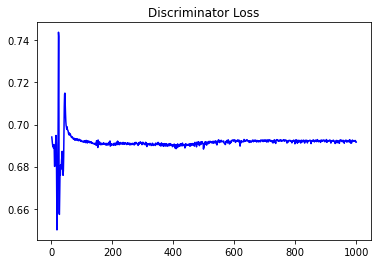

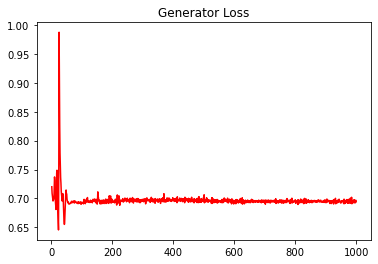

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24171476330908748


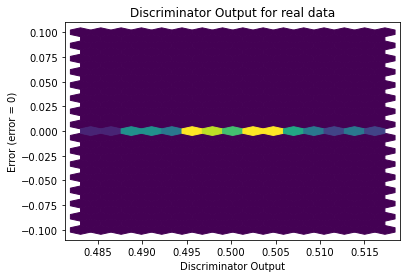

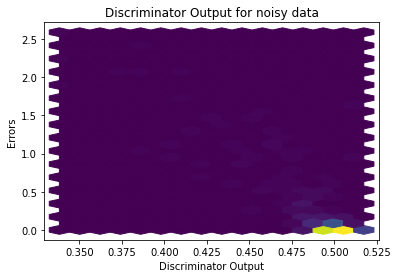

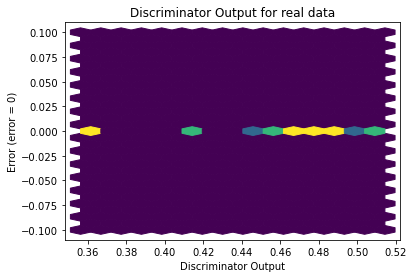

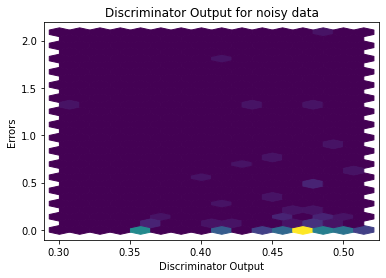

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


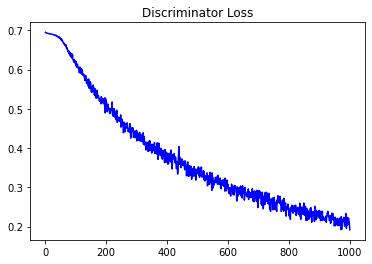

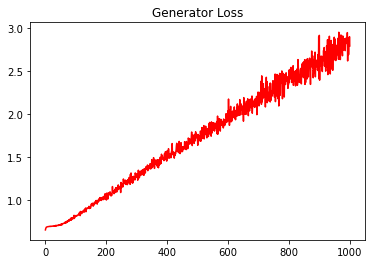

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2863716985537538


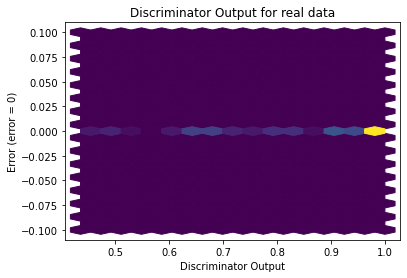

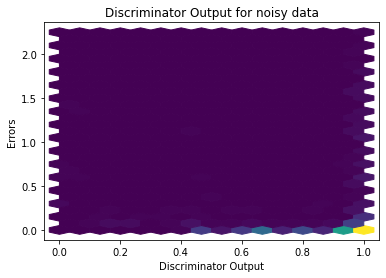

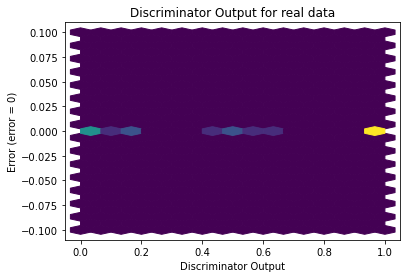

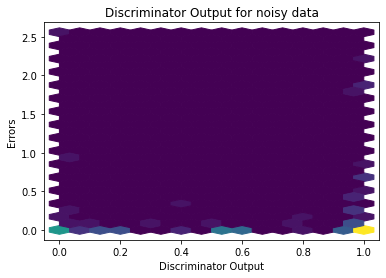

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
